In [56]:
%matplotlib inline

import json
import datetime

import numpy as np
import pandas as pd
from pandas_datareader import data, wb
import seaborn as sns

## import

Get greatest market losses over the next X days for each date

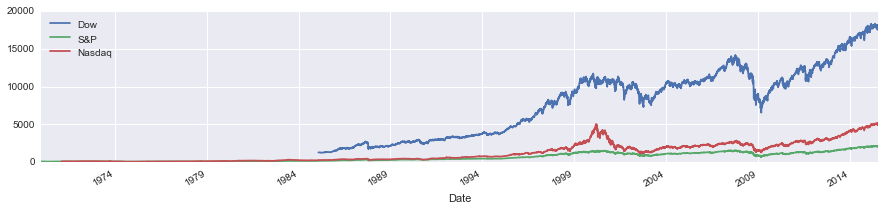

In [105]:
market = pd.read_csv('data/market_close.csv', index_col=0, parse_dates=0)
market.plot(figsize=[15,3])

In [143]:
# create df of lagged returns
ticker = 'S&P'
px = pd.DataFrame(data=market[ticker].values, 
                  columns=[0,], 
                  index=market[ticker].index)
for i in range(1, 180):
    px[i] = px[0].shift(-1 * i)
ret = (px.div(px[0], axis='index')
       .applymap(lambda x: x - 1.))

In [149]:
# create triangle mask to find max losses over a period of time
def get_max_drop(per, ret):
    """Given a dataframe of increasingly lagged returns in each column, 
    find the largest negative return between the first date in index and `per` periods in the future.

    :param per: An integer specifying number periods into future to consider
    :param per: A data frame of returns and lagged returns for each date
    :rtype: A float
    """
    m = np.ones([per,per],dtype='bool')
    m[np.triu_indices(per)] = False
    m = np.fliplr(m)
    return ret.ix[:per,1:per].mask(m).min().min()   

In [142]:
# build df of max losses over multiple ranges
drops = {}
for per in [22 * i for i in (1,3,6)]:
    drops[per] = pd.Series(data=[get_max_drop(per, ret.ix[i:,:]) for i in range(0,ret.shape[0]-per)], 
                           index=ret.index[:ret.shape[0]-per])
drops = pd.DataFrame(drops)

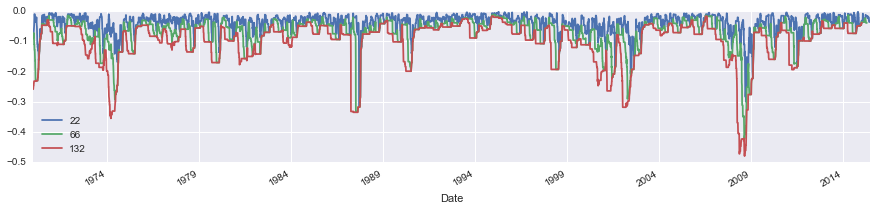

In [145]:
drops.plot(figsize=[15,3])

Daily-ize fred data

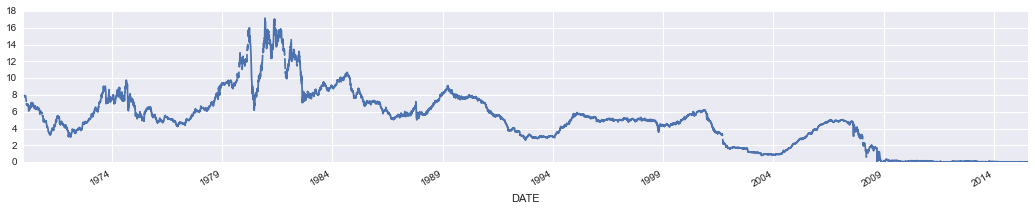

In [146]:
fred["DTB3"].plot(figsize=[18,3])

Import scraped multipl data

In [15]:
fn = "data/multipl_2015_07_26.jl"
with open(fn) as f:
    content = f.readlines()
    rows = [json.loads(c) for c in content]
multipl = pd.DataFrame(rows)
multipl.date = multipl.date.map(lambda x: pd.to_datetime(x))
# multipl = multipl.pivot(index='date', columns='title', values='value')
multipl.head()

,date,title,value
0,2015-07-24,1 Year Treasury Rate,0.0032
1,2015-06-01,1 Year Treasury Rate,0.0028
2,2015-04-01,1 Year Treasury Rate,0.0023
3,2015-02-01,1 Year Treasury Rate,0.0022
4,2014-12-01,1 Year Treasury Rate,0.0021


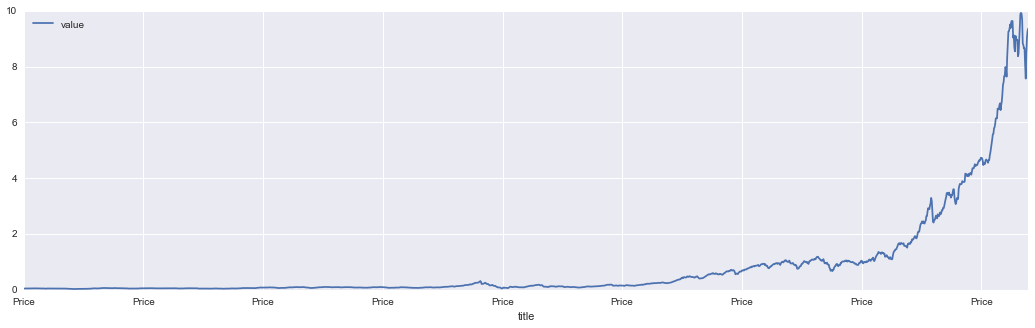

In [31]:
multipl.set_index('title').ix["Price"].sort('date').plot(figsize=[18,5])

,0
0,1
1,2
2,3
